In [ ]:
# test out aperture snr
images = blend_batch.blend_images
xs = np.zeros((len(images), blend_batch.max_n_sources))
ys = np.zeros((len(images), blend_batch.max_n_sources))
for ii, t in enumerate(blend_batch.catalog_list):
    x_peak = t['x_peak']
    y_peak = t['y_peak']
    n_sources = len(x_peak)
    xs[ii, :n_sources] = x_peak.value
    ys[ii, :n_sources] = y_peak.value

In [ ]:
from btk.measure import get_aperture_fluxes
_images = images[:, 2]
flux, err = get_aperture_fluxes(_images, xs, ys, radius=3, sky_level=sky_level)

In [ ]:
flux[2] / err[2] # snr

/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_30350/2122172718.py:1: RuntimeWarning: invalid value encountered in divide
  flux[2] / err[2] # snr


array([ 7.69918518, 11.02857571, 20.51865129, 84.61351829, 27.51998296,
        4.68118797, 13.09849755, 54.62692309, 21.96908912,         nan])

In [ ]:
from btk.measure import get_snr

iso_images = blend_batch.isolated_images[:, :, 2] # pick 'r' band
snr_r = get_snr(iso_images, sky_level)

snr_r[2]

array([ 4.60706639, 11.03056999,  2.93230449, 94.70030318,  5.38677269,
        4.78971102,  3.5918721 , 61.73415051, 21.28314728,  0.        ])

In [ ]:
flux.shape

(100, 10)

In [ ]:
np.sum((xs[2]> 0) & (ys[2] > 0))

9

In [ ]:
xs[2], ys[2], flux[2], err[2]

(array([71.80125116, 73.43234864, 64.66576253, 64.2154366 , 57.77154388,
        49.36133306, 67.11086644, 45.82631972, 60.29703322,  0.        ]),
 array([48.02814335, 54.15754761, 49.83358457, 60.84754437, 62.80980442,
        73.17862178, 47.06480956, 55.49139495, 47.83734164,  0.        ]),
 array([  9818.11358398,  21441.65803369,  24651.89339966, 138911.86958008,
         29894.2011615 ,  10755.08581093,  15823.47262177,  99118.66190918,
         33387.28842041,      0.        ]),
 array([1894.22622444, 1892.88422908, 1896.90736694, 1891.5412816 ,
        1895.56726973, 1891.5412816 , 1896.90736694, 1895.56726973,
        1895.56726973,    0.        ]))

[138911.86958008    355.15363965  99118.66190918] [1891.5412816  1884.81219132 1895.56726973]


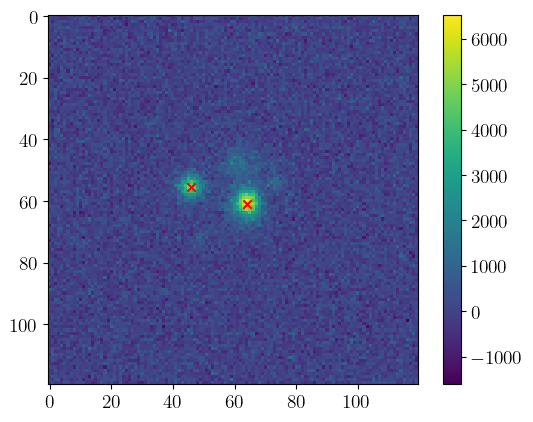

In [ ]:
import sep
image = images[2, 2]
plt.scatter(64.21543659687006, 60.84754436921078, color='r', marker='x')
plt.scatter(45.826319724980145, 55.4913949534316, color='r', marker='x')
flux, fluxerr, _ = sep.sum_circle(image, [64.21543659687006, 20, 45.826319724980145], [60.84754436921078, 20, 55.4913949534316], 3, var=sky_level)
plt.imshow(image)
print(flux, fluxerr)
plt.colorbar()